# Explore Mimic-III Datasets
**contact:** drew.wilimitis@vumc.org

## Import Libraries

In [1]:
# import libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# set matplotlib style and plotting configuration
plt.style.use('seaborn')
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore');

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# # load models for plotting and try new plotting format
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Load Data

In [2]:
# load subject level csv files (should have three csv files per subject)
init_data_path = '/Users/drew/Desktop/Walsh_Lab/lab_projects/CV_Tutorial/Data/mimic-iii-clinical-database-1.4'
processed_data_path = '/Users/drew/Desktop/github_repos/mimic3-benchmarks/data/root/'
subject_folders = os.listdir(processed_data_path)
len(subject_folders)
processed_dfs = [x for x in subject_folders if '.csv' in x]
for file in processed_dfs:
    subject_folders.remove(file)
len(subject_folders)
n_subject_files = np.array([len(os.listdir(processed_data_path + subject)) for subject in subject_folders])
len(n_subject_files)
max(n_subject_files)
min(n_subject_files)
np.sum(n_subject_files==3)
n_subject_files==3
#subject_dfs
#os.chdir('')
missing_ids = np.argwhere(n_subject_files<3)
missing_ids
missing_subjects = [subject_folders[missing_ids[i][0]] for i in range(len(missing_ids))]
for subject in missing_subjects:
    print(os.listdir(processed_data_path + str(subject)))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/drew/Desktop/github_repos/mimic3-benchmarks/data/root/'

In [26]:
# examine stay dataframe
stay_df = pd.read_csv(processed_data_path + 'all_stays.csv')
stay_df.head()
stay_df.shape
stay_df.SUBJECT_ID.nunique()
stay_df.HADM_ID.nunique()
stay_df.ICUSTAY_ID.nunique()
stay_df.isna().sum()
stay_df.duplicated().sum()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LAST_CAREUNIT,DBSOURCE,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,DIAGNOSIS,GENDER,DOB,DOD,AGE,MORTALITY_INUNIT,MORTALITY,MORTALITY_INHOSPITAL
0,268,110404,280836,MICU,carevue,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,2198-02-11 13:40:00,2198-02-18 03:55:00,2198-02-18 03:55:00,HISPANIC OR LATINO,DYSPNEA,F,2132-02-21 00:00:00,2198-02-18 00:00:00,65.982204,1,1,1
1,269,106296,206613,MICU,carevue,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,2170-11-05 11:04:00,2170-11-27 18:00:00,NaN,WHITE,SEPSIS;PILONIDAL ABSCESS,M,2130-09-30 00:00:00,NaN,40.098563,0,0,0
2,270,188028,220345,CCU,carevue,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,2128-06-23 18:26:00,2128-06-27 12:31:00,NaN,UNKNOWN/NOT SPECIFIED,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,M,2048-05-26 00:00:00,NaN,80.076660,0,0,0
3,272,164716,210407,CCU,carevue,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,2186-12-25 21:06:00,2187-01-02 14:57:00,NaN,WHITE,PULMONARY EMBOLIS,M,2119-11-21 00:00:00,NaN,67.093771,0,0,0
4,273,158689,241507,MICU,carevue,2141-04-19 06:12:05,2141-04-20 17:52:11,1.4862,2141-04-19 06:11:00,2141-04-20 17:00:00,NaN,BLACK/AFRICAN AMERICAN,POLYSUBSTANCE OVERDOSE,M,2107-08-10 00:00:00,NaN,33.691992,0,0,0


(42276, 20)

33798

42276

42276

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
LAST_CAREUNIT               0
DBSOURCE                    0
INTIME                      0
OUTTIME                     3
LOS                         3
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               37753
ETHNICITY                   0
DIAGNOSIS                   1
GENDER                      0
DOB                         0
DOD                     24073
AGE                         0
MORTALITY_INUNIT            0
MORTALITY                   0
MORTALITY_INHOSPITAL        0
dtype: int64

0

**Describe outcome prevalence and feature values**

In [27]:
# stay counts by subject
stay_df.groupby('SUBJECT_ID')['HADM_ID'].nunique().describe()
stay_df.groupby('SUBJECT_ID')['ICUSTAY_ID'].nunique().describe()
stay_df.groupby(['SUBJECT_ID', 'HADM_ID'])['ICUSTAY_ID'].nunique().describe()
stay_df.LAST_CAREUNIT.value_counts()
stay_df.DBSOURCE.value_counts()

# demographics of cohort
stay_df.AGE.describe()
stay_df.GENDER.value_counts()
stay_df.GENDER.value_counts() / len(stay_df)
stay_df.ETHNICITY.value_counts()
stay_df.ETHNICITY.value_counts() / len(stay_df)

count    33798.000000
mean         1.250843
std          0.856571
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         37.000000
Name: HADM_ID, dtype: float64

count    33798.000000
mean         1.250843
std          0.856571
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         37.000000
Name: ICUSTAY_ID, dtype: float64

count    42276.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: ICUSTAY_ID, dtype: float64

MICU     17233
CSRU      7152
SICU      6858
CCU       6004
TSICU     5029
Name: LAST_CAREUNIT, dtype: int64

carevue       23476
metavision    18739
both             61
Name: DBSOURCE, dtype: int64

count    42276.000000
mean        74.944217
std         55.767799
min         18.020534
25%         52.399042
50%         65.478439
75%         77.801506
max        310.272416
Name: AGE, dtype: float64

M    23625
F    18651
Name: GENDER, dtype: int64

M    0.558828
F    0.441172
Name: GENDER, dtype: float64

WHITE                                                       29895
BLACK/AFRICAN AMERICAN                                       3807
UNKNOWN/NOT SPECIFIED                                        3376
HISPANIC OR LATINO                                           1128
OTHER                                                         948
UNABLE TO OBTAIN                                              629
ASIAN                                                         628
PATIENT DECLINED TO ANSWER                                    387
ASIAN - CHINESE                                               203
HISPANIC/LATINO - PUERTO RICAN                                193
BLACK/CAPE VERDEAN                                            151
WHITE - RUSSIAN                                               141
BLACK/HAITIAN                                                  88
MULTI RACE ETHNICITY                                           84
WHITE - OTHER EUROPEAN                                         65
ASIAN - AS

WHITE                                                       0.707139
BLACK/AFRICAN AMERICAN                                      0.090051
UNKNOWN/NOT SPECIFIED                                       0.079856
HISPANIC OR LATINO                                          0.026682
OTHER                                                       0.022424
UNABLE TO OBTAIN                                            0.014878
ASIAN                                                       0.014855
PATIENT DECLINED TO ANSWER                                  0.009154
ASIAN - CHINESE                                             0.004802
HISPANIC/LATINO - PUERTO RICAN                              0.004565
BLACK/CAPE VERDEAN                                          0.003572
WHITE - RUSSIAN                                             0.003335
BLACK/HAITIAN                                               0.002082
MULTI RACE ETHNICITY                                        0.001987
WHITE - OTHER EUROPEAN            

In [28]:
# define grouped demographic features
stay_df.loc[(stay_df.AGE > 100), 'AGE'] = 100
stay_df['RACE'] = 'White'
#stay_df['RACE'] = stay_df.ETHNICITY.apply(lambda x: )

count    42273.000000
mean         3.607728
std          5.192107
min          0.000200
25%          1.151900
50%          2.007200
75%          3.736300
max        116.832700
Name: LOS, dtype: float64

<AxesSubplot:xlabel='LOS', ylabel='Density'>

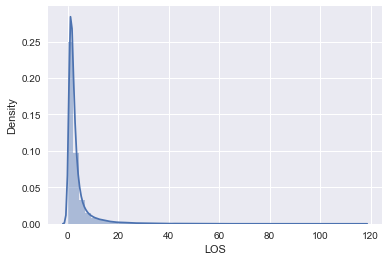

In [29]:
# length of stay outcome (regression)
stay_df.LOS.describe()
sns.distplot(stay_df.LOS, label='Length of Stay')

In [30]:
# mortality outcome (classification)
stay_df.MORTALITY.value_counts()
stay_df.MORTALITY_INHOSPITAL.value_counts()
stay_df.MORTALITY_INUNIT.value_counts()

stay_df[['MORTALITY', 'MORTALITY_INHOSPITAL', 'MORTALITY_INUNIT']].mean()

stay_df.groupby('ETHNICITY')['MORTALITY'].mean()
stay_df.groupby('GENDER')['MORTALITY'].mean()
stay_df.groupby('LAST_CAREUNIT')['MORTALITY'].mean()

0    37783
1     4493
Name: MORTALITY, dtype: int64

0    37783
1     4493
Name: MORTALITY_INHOSPITAL, dtype: int64

0    38697
1     3579
Name: MORTALITY_INUNIT, dtype: int64

MORTALITY               0.106278
MORTALITY_INHOSPITAL    0.106278
MORTALITY_INUNIT        0.084658
dtype: float64

ETHNICITY
AMERICAN INDIAN/ALASKA NATIVE                               0.058824
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE    0.333333
ASIAN                                                       0.128981
ASIAN - ASIAN INDIAN                                        0.047619
ASIAN - CAMBODIAN                                           0.214286
ASIAN - CHINESE                                             0.118227
ASIAN - FILIPINO                                            0.095238
ASIAN - JAPANESE                                            0.333333
ASIAN - KOREAN                                              0.111111
ASIAN - OTHER                                               0.222222
ASIAN - THAI                                                0.000000
ASIAN - VIETNAMESE                                          0.142857
BLACK/AFRICAN                                               0.083333
BLACK/AFRICAN AMERICAN                                      0.075650
BLACK/CAPE VERDEAN      

GENDER
F    0.113613
M    0.100487
Name: MORTALITY, dtype: float64

LAST_CAREUNIT
CCU      0.106262
CSRU     0.033138
MICU     0.132594
SICU     0.119568
TSICU    0.102008
Name: MORTALITY, dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='Density'>

<AxesSubplot:xlabel='AGE', ylabel='Density'>

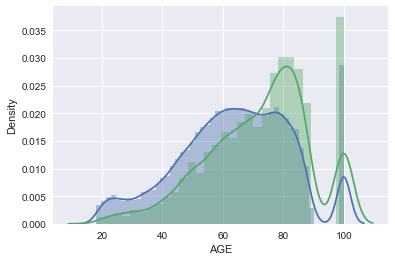

In [31]:
sns.distplot(stay_df[stay_df.MORTALITY==0]['AGE'], label='Control')
sns.distplot(stay_df[stay_df.MORTALITY==1]['AGE'], label='Deceased')

## In Hospital Mortality

In [40]:
import os
os.getcwd()
root = '/Users/drew/Desktop/Walsh_Lab/lab_projects/CV_Tutorial/mimic3-Original/data/in-hospital-mortality/train/'
for file in os.listdir(root)[1:5]:
    print(root + file)
    df = pd.read_csv(root+file)
df

'/Users/drew/Desktop/Walsh_Lab/lab_projects/CV_Tutorial/JMIR_CV_Tutorial/notebooks/Mimic_Exploration/original_version'

/Users/drew/Desktop/Walsh_Lab/lab_projects/CV_Tutorial/mimic3-Original/data/in-hospital-mortality/train/74679_episode1_timeseries.csv
/Users/drew/Desktop/Walsh_Lab/lab_projects/CV_Tutorial/mimic3-Original/data/in-hospital-mortality/train/32493_episode1_timeseries.csv
/Users/drew/Desktop/Walsh_Lab/lab_projects/CV_Tutorial/mimic3-Original/data/in-hospital-mortality/train/53459_episode1_timeseries.csv
/Users/drew/Desktop/Walsh_Lab/lab_projects/CV_Tutorial/mimic3-Original/data/in-hospital-mortality/train/47786_episode1_timeseries.csv


,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,0.865556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.35
1,2.065556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34
2,2.865556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.37
3,3.232222,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.732222,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,44.232222,NaN,59.0,0.4,None,Abnormal extension,NaN,No Response-ETT,NaN,92.0,NaN,74.0,100.0,24.0,107.0,NaN,NaN,NaN
85,45.232222,NaN,60.0,NaN,None,Abnormal extension,NaN,No Response-ETT,NaN,93.0,NaN,74.0,100.0,19.0,109.0,35.833333,NaN,NaN
86,46.232222,NaN,60.0,NaN,None,Abnormal extension,NaN,No Response-ETT,NaN,90.0,NaN,77.0,100.0,19.0,114.0,NaN,NaN,NaN
87,46.665556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.42


In [43]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer = SimpleImputer(fill_value='median')
imputer.fit_transform(df)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'None'